# COURSE:   PGP [AI&ML]

## Learner :  Chaitanya Kumar Battula
## Module  : Advanced Deep Learning
## Topic   : Object Detection- caltech-10 Data set

# 1 .The Caltech-10 Dataset

###  1 .a. Description :

Caltech-101 consists of pictures of objects belonging to 101 classes, plus one background clutter class. Each image is labelled with a single object.Collected in September 2003 by Fei-Fei Li, Marco Andreetto, and Marc 'Aurelio Ranzato. Each class contains roughly 40 to 800 images, totalling around 9k images. Images are of variable sizes, with typical edge lengths of 200-300 pixels. This version contains image-level labels only. The original dataset also contains bounding boxes.

### 1 .b. Homepage: 

http://www.vision.caltech.edu/Image_Datasets/Caltech101/

### 1 .c. Source code: 

tfds.image_classification.Caltech101

###  1 .d. Note : -


For the sake of simplcity we have changed the format of the data and stored the data in a .csv format files.Which are stored in train.csv and validation.csv files. We have  strored images in the 101_ObjectCategories.zip folder.         

The data has been splitted into train and validation csv.
The data about path, image_width, image_height, x-min, x-max, y-min,  y-max is stored in the csv files.



# 2 .Load the dataset and Import the packages

### 2 .a. Import the packages

Firstly, let's select TensorFlow version 2.x in colab

In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.5.0'

In [2]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

### 2 .b. Load the dataset

As we are using google colab, we need to mount the google drive to load the data file

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


Add path to the folder where your dataset files are

In [ ]:
project_path = "/gdrive/My Drive/Advanced Computer Vision AIML/S6 - Object detection/Inclass--v2/" 

Let's load the dataset now

In [ ]:
images_zip_path = project_path + "101_ObjectCategories.zip"

from zipfile import ZipFile

with ZipFile(images_zip_path, 'r') as z:
  z.extractall()

In [ ]:
DATASET_FOLDER = "./101_ObjectCategories/"
TRAIN_CSV = project_path + "train.csv"
VALIDATION_CSV = project_path + "validation.csv"

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import pandas as pd

In [ ]:
#Read csv file as pandas dataframe, csv file has no header
train_df = pd.read_csv(TRAIN_CSV, header=None, 
                       names=['File', 'Height','Width','xmin',
                              'xmax','ymin', 'ymax'])

In [ ]:
print(train_df.shape)
train_df.head()

(8321, 7)


,File,Height,Width,xmin,xmax,ymin,ymax
0,./101_ObjectCategories/Train/accordion/image_0...,300,260,2,300,1,260
1,./101_ObjectCategories/Train/accordion/image_0...,300,232,10,278,3,231
2,./101_ObjectCategories/Train/accordion/image_0...,282,300,2,281,2,298
3,./101_ObjectCategories/Train/accordion/image_0...,199,300,2,199,36,272
4,./101_ObjectCategories/Train/accordion/image_0...,300,223,90,299,55,222


In [ ]:
train_df['Class'] = train_df['File'].apply(lambda x: x.split('/')[3])
train_df.head()

,File,Height,Width,xmin,xmax,ymin,ymax,Class
0,./101_ObjectCategories/Train/accordion/image_0...,300,260,2,300,1,260,accordion
1,./101_ObjectCategories/Train/accordion/image_0...,300,232,10,278,3,231,accordion
2,./101_ObjectCategories/Train/accordion/image_0...,282,300,2,281,2,298,accordion
3,./101_ObjectCategories/Train/accordion/image_0...,199,300,2,199,36,272,accordion
4,./101_ObjectCategories/Train/accordion/image_0...,300,223,90,299,55,222,accordion


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['Label'] = le.fit_transform(train_df['Class'])
train_df.head()

,File,Height,Width,xmin,xmax,ymin,ymax,Class,Label
0,./101_ObjectCategories/Train/accordion/image_0...,300,260,2,300,1,260,accordion,5
1,./101_ObjectCategories/Train/accordion/image_0...,300,232,10,278,3,231,accordion,5
2,./101_ObjectCategories/Train/accordion/image_0...,282,300,2,281,2,298,accordion,5
3,./101_ObjectCategories/Train/accordion/image_0...,199,300,2,199,36,272,accordion,5
4,./101_ObjectCategories/Train/accordion/image_0...,300,223,90,299,55,222,accordion,5


In [ ]:
#Create a dictionary to hold label and corresponding class name
num_classes = train_df['Label'].unique()
label_class_dict = dict(zip(train_df['Label'], train_df['Class']))
#label_class_dict

In [ ]:
num_classes

array([  5,   0,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
        17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  36,  37,  38,  39,   1,   2,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,   3,  58,  59,  60,  61,  62,  63,  64,  65,
         4,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [ ]:
label_class_dict

{0: 'Airplanes_Side_2',
 1: 'Faces_2',
 2: 'Faces_3',
 3: 'Leopards',
 4: 'Motorbikes_16',
 5: 'accordion',
 6: 'anchor',
 7: 'ant',
 8: 'barrel',
 9: 'bass',
 10: 'beaver',
 11: 'binocular',
 12: 'bonsai',
 13: 'brain',
 14: 'brontosaurus',
 15: 'buddha',
 16: 'butterfly',
 17: 'camera',
 18: 'cannon',
 19: 'car_side',
 20: 'ceiling_fan',
 21: 'cellphone',
 22: 'chair',
 23: 'chandelier',
 24: 'cougar_body',
 25: 'cougar_face',
 26: 'crab',
 27: 'crayfish',
 28: 'crocodile',
 29: 'crocodile_head',
 30: 'cup',
 31: 'dalmatian',
 32: 'dollar_bill',
 33: 'dolphin',
 34: 'dragonfly',
 35: 'electric_guitar',
 36: 'elephant',
 37: 'emu',
 38: 'euphonium',
 39: 'ewer',
 40: 'ferry',
 41: 'flamingo',
 42: 'flamingo_head',
 43: 'garfield',
 44: 'gerenuk',
 45: 'gramophone',
 46: 'grand_piano',
 47: 'hawksbill',
 48: 'headphone',
 49: 'hedgehog',
 50: 'helicopter',
 51: 'ibis',
 52: 'inline_skate',
 53: 'joshua_tree',
 54: 'kangaroo',
 55: 'ketch',
 56: 'lamp',
 57: 'laptop',
 58: 'llama',
 59:

Show images with bounding box

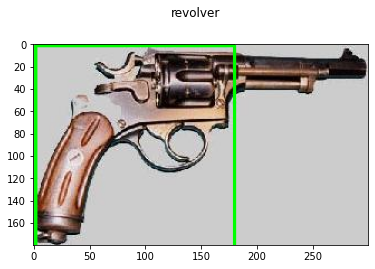

In [ ]:
#Pickup a random image number
img_num = np.random.randint(0, train_df.shape[0])

#Read the image and draw a rectangle as per bounding box information
img = cv2.imread(train_df.loc[img_num,'File'])
cv2.rectangle(img, 
             (train_df.loc[img_num, 'xmin'],train_df.loc[img_num, 'ymin']),
             (train_df.loc[img_num, 'xmax'],train_df.loc[img_num, 'ymax']), 
             (0,255,0),
             2)
#Convert BGR format (used by opencv to RGB format used by matplotlib)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Draw image using matplotlib
plt.suptitle(train_df.loc[img_num, 'Class'])
plt.imshow(img)
plt.show()

In [ ]:
#Read the validation csv file
test_df = pd.read_csv(VALIDATION_CSV, header=None, 
                       names=['File', 'Height','Width','xmin',
                              'xmax','ymin', 'ymax'])

In [ ]:
test_df['Class'] = test_df['File'].apply(lambda x: x.split('/')[3])
test_df.head()

,File,Height,Width,xmin,xmax,ymin,ymax,Class
0,./101_ObjectCategories/validation/accordion/im...,273,300,2,263,77,299,accordion
1,./101_ObjectCategories/validation/accordion/im...,242,300,1,227,45,300,accordion
2,./101_ObjectCategories/validation/accordion/im...,227,300,1,187,77,299,accordion
3,./101_ObjectCategories/validation/accordion/im...,230,300,1,230,1,300,accordion
4,./101_ObjectCategories/validation/accordion/im...,256,300,62,216,122,287,accordion


In [ ]:
from sklearn.preprocessing import LabelEncoder
test_df['Label'] = le.transform(test_df['Class'])
test_df.head()

,File,Height,Width,xmin,xmax,ymin,ymax,Class,Label
0,./101_ObjectCategories/validation/accordion/im...,273,300,2,263,77,299,accordion,5
1,./101_ObjectCategories/validation/accordion/im...,242,300,1,227,45,300,accordion,5
2,./101_ObjectCategories/validation/accordion/im...,227,300,1,187,77,299,accordion,5
3,./101_ObjectCategories/validation/accordion/im...,230,300,1,230,1,300,accordion,5
4,./101_ObjectCategories/validation/accordion/im...,256,300,62,216,122,287,accordion,5


In [ ]:
train_df.shape, test_df.shape

((8321, 9), (356, 9))

#### Build a Batch Generator

In [ ]:
import tensorflow as tf

In [ ]:
img_size = 224

In [ ]:
def batch_generator(df, batch_size=32):

    while True:

        #Create indexes
        image_nums = np.random.randint(0,df.shape[0], size=batch_size)

        #Create empty arrays
        #1. To hold image input
        batch_images = np.zeros(shape=(batch_size, img_size, img_size, 3))
        #Classification Labels 
        batch_labels = np.zeros(shape=(batch_size, len(num_classes)))
        #Regression labels - 4 numbers per example image
        batch_bboxes = np.zeros(shape=(batch_size, 4))
        

        for i in range(batch_size):

            #Read image and resize
            img = tf.keras.preprocessing.image.load_img(df.loc[image_nums[i], 'File'], 
                                                        target_size=(img_size, img_size))
            
            #Conver to numpy array
            img_array = tf.keras.preprocessing.image.img_to_array(img)

            #Update batch
            batch_images[i] = img_array

            #Read image classification label & convert to one hot vector
            cl_label = df.loc[image_nums[i], 'Label']
            cl_label = tf.keras.utils.to_categorical(cl_label, num_classes=len(num_classes))
            batch_labels[i] = cl_label

            #Read and resize bounding box co-ordinates
            img_width = df.loc[image_nums[i], 'Width']
            img_height = df.loc[image_nums[i], 'Height']
            
            xmin = df.loc[image_nums[i], 'xmin'] * img_size/img_width
            xmax = df.loc[image_nums[i], 'xmax'] * img_size/img_width

            ymin = df.loc[image_nums[i], 'ymin'] * img_size/img_height
            ymax = df.loc[image_nums[i], 'ymax'] * img_size/img_height

            #We will ask model to predict xmin, ymin, width and height of bounding box
            batch_bboxes[i] = [xmin, ymin, xmax-xmin, ymax-ymin]

        #Normalize batch images as per Pre-trained model to be used
        batch_images = tf.keras.applications.resnet50.preprocess_input(batch_images)
        
        #Make bounding boxes (x, y, w, h) as numbers between 0 and 1 - this seems to work better
        batch_bboxes = batch_bboxes/img_size

        #Return batch - use yield function to make it a python generator
        yield batch_images, [batch_labels, batch_bboxes]

#### Build the Model

Load Pre-Trained Model

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.applications.resnet50.ResNet50(include_top=False, #Do not include FC layer at the end
                                          input_shape=(img_size,img_size, 3),
                                          weights='imagenet')

94773248/94765736 [==============================] - 0s 0us/step


Freeze all layers of Pre-trained model

In [ ]:
len(model.layers)

175

In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
for layer in model.layers:
    layer.trainable = False
#for layer in model.layers[150:]:
#    layer.trainable = True

In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
model.output

<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

Add layers

In [ ]:
#get Output layer of Pre-trained model
x = model.output

#Flatten the output to feed to Dense layer
x = tf.keras.layers.Flatten()(x)

#Add Dropout
x = tf.keras.layers.Dropout(0.5)(x)

#Add one Dense layer
x = tf.keras.layers.Dense(200, activation='relu')(x)

#Batch Norm
x = tf.keras.layers.BatchNormalization()(x)

Build layer for Label output

In [ ]:
#Classification
label_output = tf.keras.layers.Dense(len(num_classes), 
                                     activation='softmax', 
                                     name='class_op')(x)

Build layer for bounding box output

In [ ]:
#Regression
bbox_output = tf.keras.layers.Dense(4 , 
                                    activation='sigmoid', 
                                    name='reg_op')(x)

Finalize the model

In [ ]:
#Non Sequential model as it has two different outputs
final_model = tf.keras.models.Model(inputs=model.input, #Pre-trained model input as input layer
                                    outputs=[label_output,bbox_output]) #Output layer added

In [ ]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
final_model.compile(optimizer='adam', 
                    loss={'reg_op':'mse', 'class_op':'categorical_crossentropy'},
                    loss_weights={'reg_op':1, 'class_op':7},
                    metrics=['accuracy'])

In [ ]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

Train the model

In [ ]:
#Create train and test generator
batchsize = 64
train_generator = batch_generator(train_df, batch_size=batchsize) #batchsize can be changed
test_generator = batch_generator(test_df, batch_size=batchsize)

In [ ]:
final_model.fit_generator(train_generator, 
                          epochs=20,
                          steps_per_epoch= train_df.shape[0]//batchsize,
                          validation_data=test_generator,
                          validation_steps = test_df.shape[0]//batchsize)

Epoch 1/20
130/130 [==============================] - 68s 244ms/step - loss: 8.7442 - class_op_loss: 1.2191 - reg_op_loss: 0.2102 - class_op_accuracy: 0.7700 - reg_op_accuracy: 0.5010 - val_loss: 2.2190 - val_class_op_loss: 0.2922 - val_reg_op_loss: 0.1737 - val_class_op_accuracy: 0.9219 - val_reg_op_accuracy: 0.7719
Epoch 2/20
130/130 [==============================] - 31s 238ms/step - loss: 0.7031 - class_op_loss: 0.0830 - reg_op_loss: 0.1224 - class_op_accuracy: 0.9841 - reg_op_accuracy: 0.7489 - val_loss: 1.9474 - val_class_op_loss: 0.2586 - val_reg_op_loss: 0.1371 - val_class_op_accuracy: 0.9344 - val_reg_op_accuracy: 0.7750
Epoch 3/20
130/130 [==============================] - 31s 239ms/step - loss: 0.2897 - class_op_loss: 0.0291 - reg_op_loss: 0.0860 - class_op_accuracy: 0.9951 - reg_op_accuracy: 0.7968 - val_loss: 1.7380 - val_class_op_loss: 0.2337 - val_reg_op_loss: 0.1022 - val_class_op_accuracy: 0.9375 - val_reg_op_accuracy: 0.8188
Epoch 4/20
130/130 [=======================

In [ ]:
final_model.save('pet_dataset_localization.h5')

#### Model Prediction

In [ ]:
def predict_and_draw(image_num, df):

    #Load image
    img = tf.keras.preprocessing.image.load_img(df.loc[image_num, 'File'])
    w, h = img.size

    #Read actual label and bounding box
    act_class = df.loc[image_num, 'Class']
    xmin, ymin, xmax, ymax = df.loc[image_num, ['xmin', 'ymin', 'xmax', 'ymax']]
    
    #Prepare input for model
    #1. Resize image
    img_resized = img.resize((img_size, img_size)) 
    #2. Conver to array and make it a batch of 1
    input_array = tf.keras.preprocessing.image.img_to_array(img_resized)
    input_array = np.expand_dims(input_array, axis=0)
    #3. Normalize image data
    input_array = tf.keras.applications.resnet50.preprocess_input(input_array)

    #Prediction
    pred = final_model.predict(input_array)
    #Get classification and regression predictions
    label_pred, bbox_pred = pred[0][0], pred[1][0]
    #Get Label with highest probability
    pred_class = label_class_dict[np.argmax(label_pred)]

    print('Real Label :', act_class, '\nPredicted Label: ', pred_class)
    
    #Draw bounding boxes - Actual (Red) and Predicted(Green)
    img = cv2.imread(df.loc[image_num, 'File'])
    #Draw actual bounding box
    img = cv2.rectangle(img, (xmin, ymin), 
                        (xmax, ymax), (0,0,255), 2)
    #Draw predicted bounding box
    img = cv2.rectangle(img, (int(bbox_pred[0]*w), int(bbox_pred[1]*h)), 
                        (int((bbox_pred[0]+bbox_pred[2])*w), int((bbox_pred[1]+bbox_pred[3])*h)), (0,255,0), 2)

    #Display the picture
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

Real Label : butterfly 
Predicted Label:  butterfly


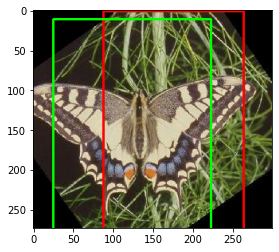

In [ ]:
#Predict on Test Dataset
image_num = np.random.randint(0, test_df.shape[0])
predict_and_draw(image_num, test_df)